In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
import statistics

## Exploratory Data Analysis

In [4]:
dataset = pd.read_csv('Credit_Card_train.csv')

In [5]:
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
dataset.tail(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
19995,19996,130000.0,2,2,1,40,0,0,0,0,...,95953.0,73970.0,107785.0,5400.0,6950.0,4600.0,4000.0,2000.0,2300.0,0
19996,19997,60000.0,2,2,1,37,0,0,0,0,...,52089.0,29397.0,29110.0,3000.0,2570.0,2202.0,1200.0,1100.0,1100.0,1
19997,19998,290000.0,2,2,1,41,-1,-1,-2,-1,...,9194.0,9194.0,399.0,0.0,0.0,9194.0,0.0,399.0,9290.0,0
19998,19999,150000.0,2,2,1,41,0,0,-1,-1,...,1617.0,0.0,620.0,3000.0,2306.0,2610.0,0.0,620.0,0.0,0
19999,20000,240000.0,2,2,1,37,-1,2,-1,-1,...,0.0,1317.0,566.0,0.0,14015.0,0.0,1317.0,0.0,0.0,0


In [5]:
dataset.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         20000 non-null  int64  
 1   LIMIT_BAL  20000 non-null  float64
 2   SEX        20000 non-null  int64  
 3   EDUCATION  20000 non-null  int64  
 4   MARRIAGE   20000 non-null  int64  
 5   AGE        20000 non-null  int64  
 6   PAY_0      20000 non-null  int64  
 7   PAY_2      20000 non-null  int64  
 8   PAY_3      20000 non-null  int64  
 9   PAY_4      20000 non-null  int64  
 10  PAY_5      20000 non-null  int64  
 11  PAY_6      20000 non-null  int64  
 12  BILL_AMT1  20000 non-null  float64
 13  BILL_AMT2  20000 non-null  float64
 14  BILL_AMT3  20000 non-null  float64
 15  BILL_AMT4  20000 non-null  float64
 16  BILL_AMT5  20000 non-null  float64
 17  BILL_AMT6  20000 non-null  float64
 18  PAY_AMT1   20000 non-null  float64
 19  PAY_AMT2   20000 non-null  float64
 20  PAY_AM

In [7]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,163301.184000,1.614050,1.836950,1.556650,35.333250,0.021450,-0.104200,-0.136300,-0.197350,...,41465.528350,39526.671650,38175.691550,5521.068200,5.746194e+03,4734.48815,4725.797750,4758.792600,5080.159350,0.227900
std,5773.647028,128746.703255,0.486831,0.769542,0.522785,9.210659,1.121094,1.204124,1.210659,1.168063,...,61660.906637,59309.327387,58707.218759,15250.374823,2.151862e+04,15823.31417,15180.461542,15447.369651,17306.821534,0.419488
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-37594.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2309.500000,1718.750000,1193.750000,967.750000,7.407500e+02,322.00000,237.750000,216.000000,10.000000,0.000000
50%,10000.500000,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18889.500000,18132.000000,16995.500000,2084.000000,2.000000e+03,1593.00000,1496.500000,1500.000000,1407.000000,0.000000
75%,15000.250000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,51123.500000,49529.250000,48672.250000,5000.000000,5.000000e+03,4054.50000,4000.000000,4000.000000,4000.000000,0.000000
max,20000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.00000,497000.000000,417990.000000,528666.000000,1.000000


In [8]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [9]:
# check missing values
dataset.isnull().values.any()

False

## Visualization

### Histogram 

In [12]:
default_count = dataset['Default'].value_counts()

<AxesSubplot:title={'center':'Default Credit Card Client, Default = 1, Non-default = 0'}, ylabel='Default'>

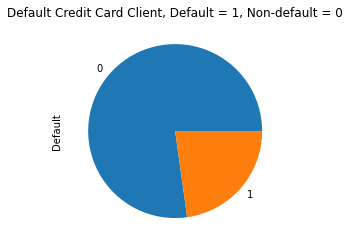

In [16]:
default_count.plot.pie(title = 'Default Credit Card Client, Default = 1, Non-default = 0')

/Users/zhouyuning/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

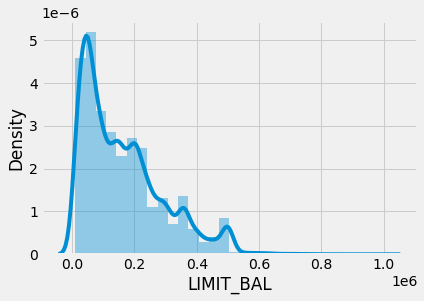

In [14]:
# limit_bal
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)

In [15]:
dataset['LIMIT_BAL'].value_counts()

50000.0      2354
20000.0      1355
30000.0      1175
80000.0      1063
200000.0      990
             ... 
16000.0         1
720000.0        1
327680.0        1
740000.0        1
1000000.0       1
Name: LIMIT_BAL, Length: 76, dtype: int64

In [21]:
statistics.median(dataset['LIMIT_BAL'])

130000.0

2    12281
1     7719
Name: SEX, dtype: int64

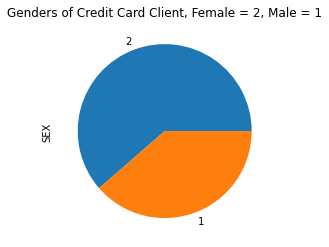

In [23]:
# sex 
sex_count = dataset['SEX'].value_counts()
sex_count.plot.pie(title = 'Genders of Credit Card Client, Female = 2, Male = 1')

In [17]:
dataset['SEX'].value_counts()

2    12281
1     7719
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

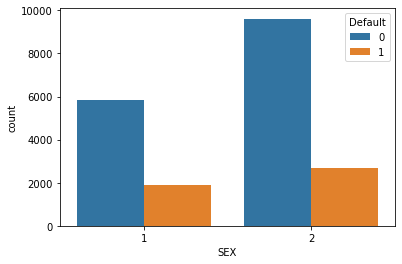

In [29]:
sns.countplot(x='SEX', data=dataset,hue="Default")  

Text(0.5, 1.0, 'Count of education levels')

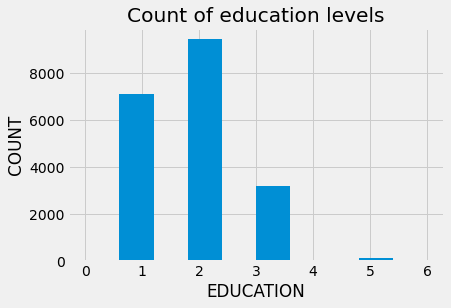

In [18]:
# education 
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('Count of education levels')

In [19]:
dataset['EDUCATION'].value_counts()

2    9451
1    7113
3    3191
5     151
4      57
6      28
0       9
Name: EDUCATION, dtype: int64

<AxesSubplot:title={'center':'Marital Status of Credit Card Client, 1 = married; 2 = single; 3 = others'}, ylabel='MARRIAGE'>

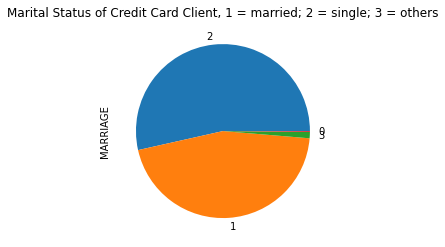

In [25]:
# marriage 
sex_count = dataset['MARRIAGE'].value_counts()
sex_count.plot.pie(title = 'Marital Status of Credit Card Client, 1 = married; 2 = single; 3 = others')

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

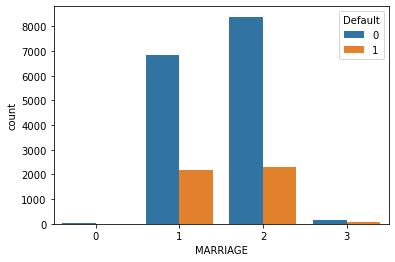

In [30]:
sns.countplot(x='MARRIAGE', data=dataset,hue="Default")  

In [21]:
dataset['MARRIAGE'].value_counts()

2    10702
1     9033
3      232
0       33
Name: MARRIAGE, dtype: int64

In [27]:
9033/20000

0.45165

Text(0.5, 1.0, 'Count of age levels')

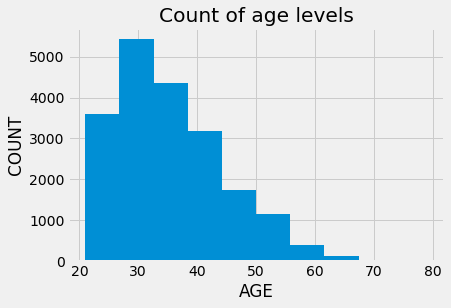

In [22]:
# age 
plt.style.use('fivethirtyeight')
dataset['AGE'].hist()
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.title('Count of age levels')

In [24]:
statistics.median(dataset['AGE'])

34.0

In [23]:
dataset['AGE'].value_counts()

29    1068
27     974
28     943
30     910
26     871
25     814
24     786
33     776
34     767
31     766
32     765
36     757
35     740
37     680
23     661
39     641
38     633
40     567
42     552
41     539
43     455
44     431
45     410
22     410
46     382
47     333
48     310
49     299
50     256
53     221
51     215
52     188
54     146
55     129
56     109
58      86
57      82
59      51
60      47
21      46
61      35
62      34
63      23
66      20
64      20
65      13
69      12
67      10
70       6
68       4
73       2
71       2
75       1
72       1
79       1
Name: AGE, dtype: int64

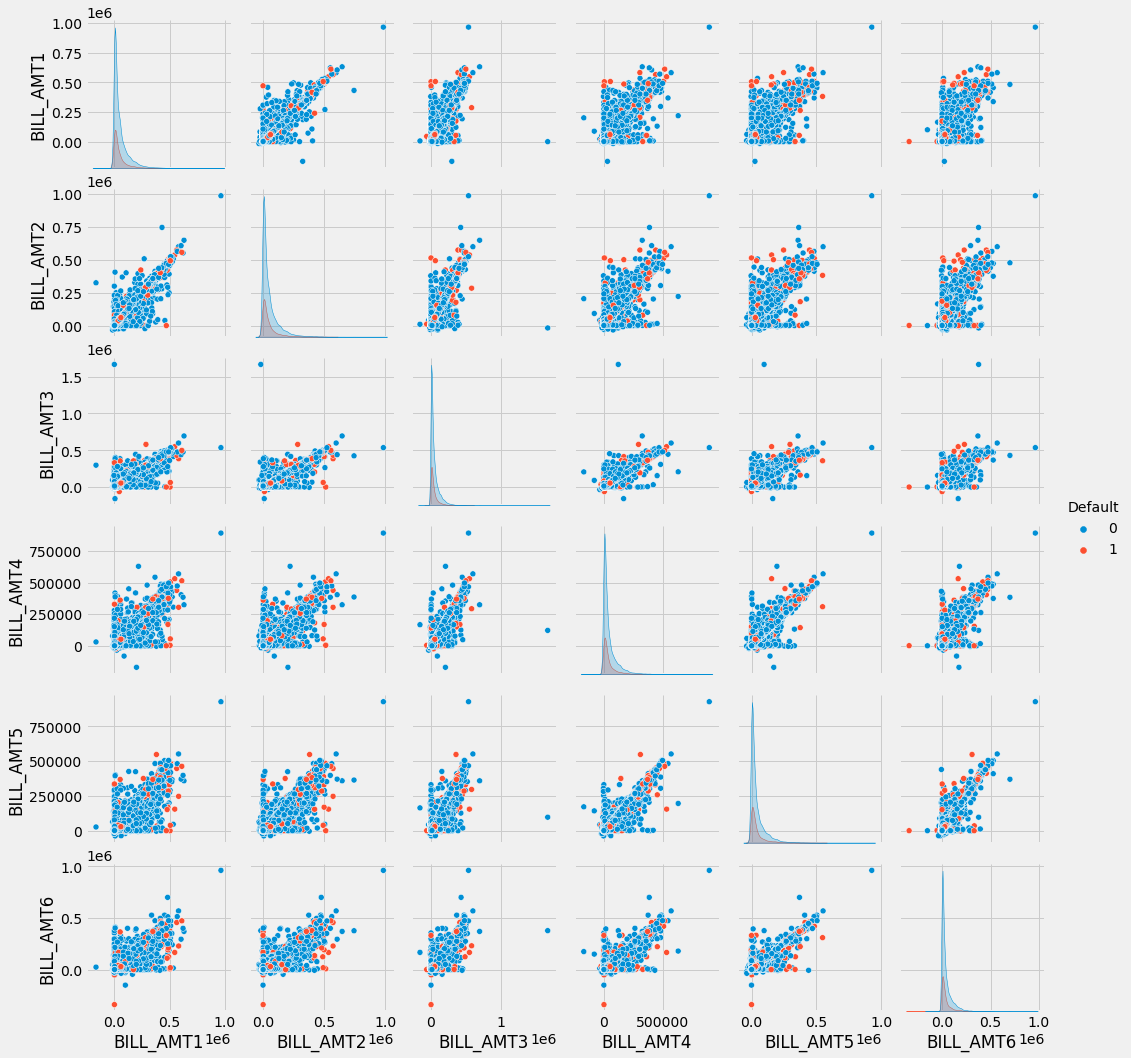

In [24]:
# check the correlation
# bill_amt
sns.pairplot(dataset, vars = dataset.columns[12:18], kind='scatter',hue= 'Default')

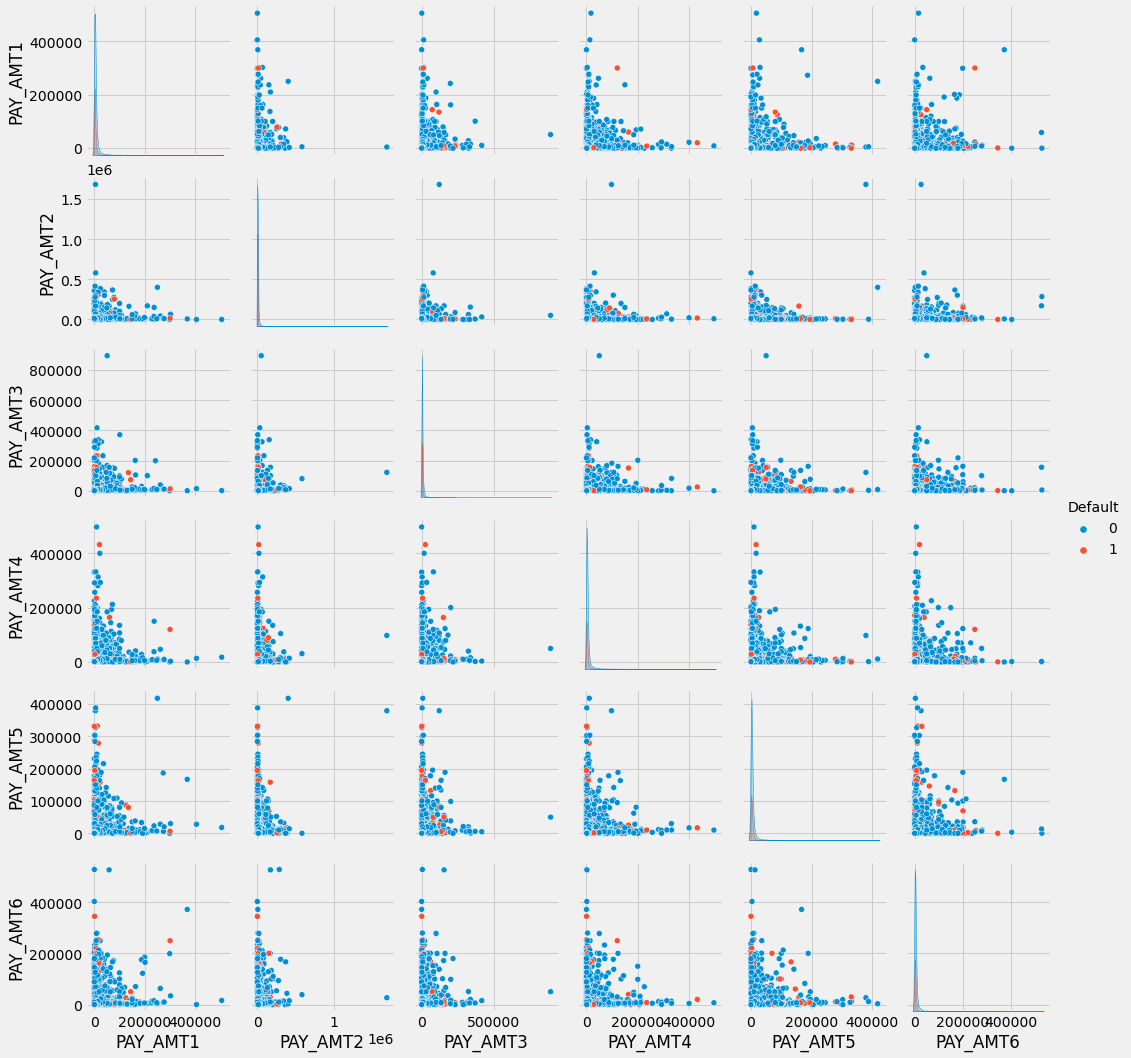

In [25]:
# check the correlation
# pay_amt
sns.pairplot(dataset, vars = dataset.columns[18:24],hue = 'Default')

In [75]:
# correlation between features 
correlation = dataset.corr()

In [8]:
# corr between numerical 
num_data = dataset.drop(dataset.columns[[0,1,2,3,4,5]], axis=1) 
num_data = num_data.drop(num_data.columns[[-1]], axis=1) 
num_data.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [9]:
num_corr = num_data.corr()

<AxesSubplot:>

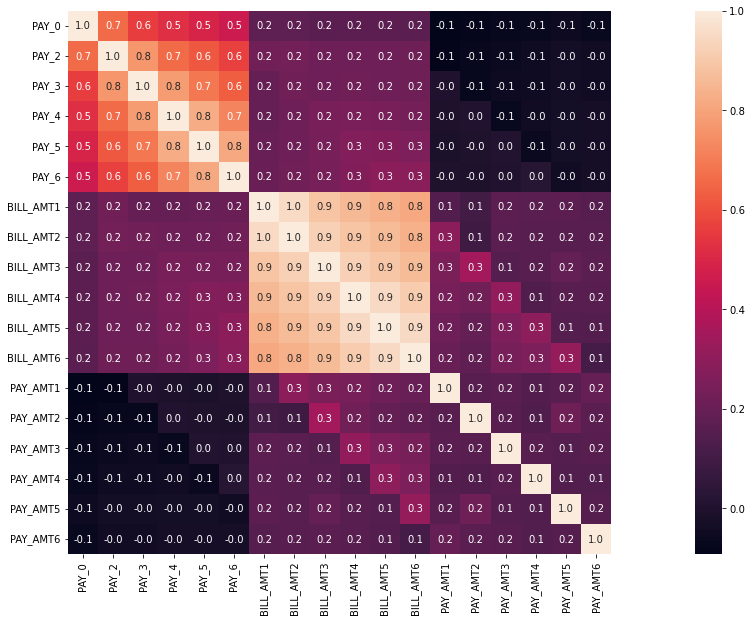

In [10]:
# heatmap
plt.subplots(figsize=(30,10))
sns.heatmap(num_corr, square=True, annot=True, fmt=".1f")  

## Feature Engineering

### PAY_X to SumPay

In [167]:
data = dataset

# PAY_X sum up to one single variable, while a higher (positive) score means a worse case
data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] = data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].apply(pd.to_numeric)
data['SumPay'] = data['PAY_0'] + data['PAY_2'] + data['PAY_3'] + data['PAY_4'] + data['PAY_5'] + data['PAY_6']
data = data.drop(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis = 1)
print(data)


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  BILL_AMT1  BILL_AMT2  \
0          1    20000.0    2          2         1   24     3913.0     3102.0   
1          2   120000.0    2          2         2   26     2682.0     1725.0   
2          3    90000.0    2          2         2   34    29239.0    14027.0   
3          4    50000.0    2          2         1   37    46990.0    48233.0   
4          5    50000.0    1          2         1   57     8617.0     5670.0   
...      ...        ...  ...        ...       ...  ...        ...        ...   
19995  19996   130000.0    2          2         1   40   133559.0   129869.0   
19996  19997    60000.0    2          2         1   37    59462.0    60866.0   
19997  19998   290000.0    2          2         1   41     2025.0        0.0   
19998  19999   150000.0    2          2         1   41     4474.0     3881.0   
19999  20000   240000.0    2          2         1   37     1769.0      842.0   

       BILL_AMT3  BILL_AMT4  BILL_AMT5 

In [192]:
# PCA to BILL_AMTX
bill = pd.DataFrame(data[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 
                         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
pca = PCA(n_components=2)
pca.fit(bill)
bill = pca.transform(bill)
print(bill)

[[-104500.25927409    1463.52586689]
 [-101063.81085539   -3760.81777513]
 [ -66064.48458373    2483.74161169]
 ...
 [ -99837.13114508   -7788.51965051]
 [-102826.75809044    1349.03668228]
 [-100073.13193196    -968.69969055]]


In [193]:
bill_df = pd.DataFrame(bill, columns = ['Bill_pca1','Bill_pca2'])
bill_df
data["Bill_pca1"] = bill_df["Bill_pca1"]
data["Bill_pca2"] = bill_df["Bill_pca2"]

In [194]:
data = data.drop(['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 
                         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis = 1)
print(data)

          ID  LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  PAY_AMT1  PAY_AMT2  \
0          1    20000.0   2         2        1   24       0.0     689.0   
1          2   120000.0   2         2        2   26       0.0    1000.0   
2          3    90000.0   2         2        2   34    1518.0    1500.0   
3          4    50000.0   2         2        1   37    2000.0    2019.0   
4          5    50000.0   1         2        1   57    2000.0   36681.0   
...      ...        ...  ..       ...      ...  ...       ...       ...   
19995  19996   130000.0   2         2        1   40    5400.0    6950.0   
19996  19997    60000.0   2         2        1   37    3000.0    2570.0   
19997  19998   290000.0   2         2        1   41       0.0       0.0   
19998  19999   150000.0   2         2        1   41    3000.0    2306.0   
19999  20000   240000.0   2         2        1   37       0.0   14015.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default SumPay      Bill_pca1  \
0           0.0    

## Standardization

In [162]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# plot

## OneHot Encoding

In [174]:
data_encode = data

# Set 'category' type to categorical attributes
categorical_vars = ['SEX','EDUCATION','MARRIAGE']
data_encode[categorical_vars] = data_encode[categorical_vars].astype(str)

# one-hot encoding, and drop original columns
data_encode = pd.get_dummies(data_encode, columns = categorical_vars, drop_first = True)
data_encode.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,1,0,0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,1,0,1,0,0,0,0,0,1,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,1,0,1,0,0,0,0,0,1,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,1,0,1,0,0,0,0,1,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,1,0,0,0,0,1,0,0


In [175]:
data_encode.shape

(20000, 27)

## Split train test

In [176]:
# Separating features and target
y = data_encode.Default     # target default=1 or non-default=0
X = data_encode.drop('Default', axis = 1, inplace = False)

In [177]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.30)

In [178]:
# Check dimensions
print(np.shape(X_train_val))
print(np.shape(X_test))
print(np.shape(y_train_val))
print(np.shape(y_test))

(14000, 26)
(6000, 26)
(14000,)
(6000,)


## PCA

In [179]:
from sklearn.decomposition import PCA

print(f"Actual number of components: {len(X_train_val.columns.values)}")

n_pc = len(X_train_val.columns.values) 
print(n_pc)

Actual number of components: 26
26


In [180]:
pca = PCA(n_components = n_pc)
pca.fit(X_train_val)

PCA(n_components=26)

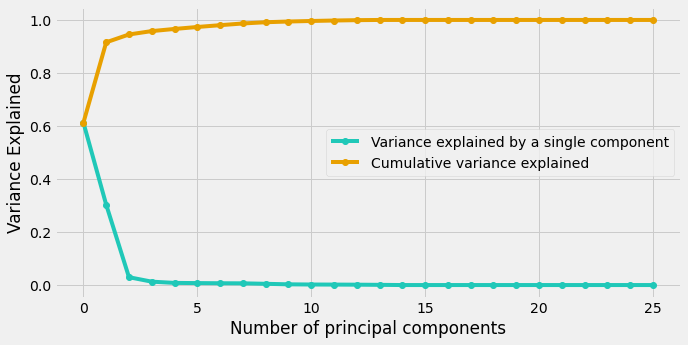

In [181]:
# print(np.cumsum(pca.explained_variance_ratio_))
# print(pca.explained_variance_ratio_)

fig=plt.figure(1, figsize=(10,5))
plt.grid(b=True, which='major', axis='both')
plt.plot(pca.explained_variance_ratio_, marker='o', color='#20c8b8')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='#e8a000')
# plt.xticks([n for n in range(0,n_pc)], [ "PC"+str(n) for n in range(1,n_pc+1)])
plt.legend(["Variance explained by a single component", "Cumulative variance explained"])
plt.xlabel('Number of principal components')
plt.ylabel('Variance Explained')
plt.savefig("PCA");